# Training a Model using TensorFlow

## Converting Celsius to Fahrenheit

In [0]:
# importing packages
import tensorflow as tf
import numpy as np

tf.logging.set_verbosity(tf.logging.ERROR)

## Setting up the training data

In [0]:
# training data
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in zip(celsius_q, fahrenheit_a):
  print("{} degrees Celsius is {} degrees Fahrenheit".format(i, c))

-40.0 degrees Celsius is -40.0 degrees Fahrenheit
-10.0 degrees Celsius is 14.0 degrees Fahrenheit
0.0 degrees Celsius is 32.0 degrees Fahrenheit
8.0 degrees Celsius is 46.0 degrees Fahrenheit
15.0 degrees Celsius is 59.0 degrees Fahrenheit
22.0 degrees Celsius is 72.0 degrees Fahrenheit
38.0 degrees Celsius is 100.0 degrees Fahrenheit


## Creating the Model

The model will consist of a single layer, with a single neruon, utilizing a dense network structure.  

In [0]:
l0 =  tf.keras.layers.Dense(units=1, input_shape=[1])

## Assemble layers in the Model

Once layer is  defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as argument, specifying the calculation order from the input to the output.

In [0]:
model = tf.keras.Sequential([l0])

## Compile the model, with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:

- **Loss function** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

- **Optimizer function** — A way of adjusting internal values in order to reduce the loss.

In [0]:
model.compile(loss='mean_squared_error',
             optimizer=tf.keras.optimizers.Adam(0.1))

## Train the Model

In [0]:
history = model.fit(celsius_q, fahrenheit_a,
                   epochs=500,
                   verbose=False)
print("Finished training the model")

Finished training the model


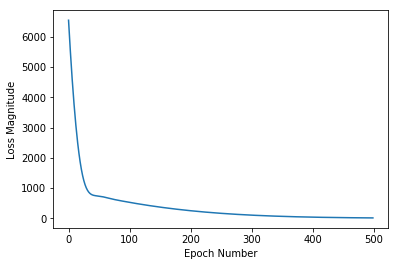

In [0]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

## Model Predictions and Sanity Check

In [0]:
prediction = model.predict([100.0])
expected = 1.8*100+32

print("The predicted value {} vs the expected value {}".format(int(prediction[0][0]), expected))

The predicted value 211 vs the expected value 212.0


In [0]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8271911]], dtype=float32), array([28.56987], dtype=float32)]
